In [2]:
!pip3 uninstall torch
!pip3 install https://download.pytorch.org/whl/cu100/torch-1.0.1.post2-cp36-cp36m-linux_x86_64.whl

Uninstalling torch-1.0.1.post2:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/lib/python3.6/dist-packages/caffe2/*
    /usr/local/lib/python3.6/dist-packages/torch-1.0.1.post2.dist-info/*
    /usr/local/lib/python3.6/dist-packages/torch/*
Proceed (y/n)? y
  Successfully uninstalled torch-1.0.1.post2
  Using cached https://download.pytorch.org/whl/cu100/torch-1.0.1.post2-cp36-cp36m-linux_x86_64.whl


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [5]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/content/data/imdb_sample/data_save.pkl'),
 PosixPath('/content/data/imdb_sample/texts.csv')]

In [6]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [7]:
df.shape

(1000, 3)

In [8]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [0]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')


In [10]:
data_lm

TextClasDataBunch;

Train: LabelList (799 items)
x: TextList
xxbos movie goers - avoid watching this movie . if you are faint hearted , you might want to commit suicide . if you are a short tempered , you would want to kill the lead performer of the movie . 
 
  xxmaj though he does not have any talent in acting , he is the mass hero for all the rickshaw xxunk , auto rickshaw drivers , xxunk , thugs and immature and ignorant xxunk . 
 
  he proves - you do not need neither talent nor knowledge to be successfully . 
 
  xxmaj he is the highest paid actor in xxmaj india . xxmaj that shows the taste of movie going public in xxmaj india . 90 % of movie goers in xxunk xxunk are definitely attracted to his kind of nonsense movies .,xxbos i do n't know what it was about this film that made me react so xxunk against it . xxmaj perhaps it was the characters who so unlikable and were not compelling enough to care about . xxmaj perhaps it was the disorganized storyline . xxmaj perhaps it was the 

In [0]:
data_lm.save()

In [0]:
data = load_data(path)

In [13]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative
"xxbos \n \n i 'm sure things did n't exactly go the same way in the real life of xxmaj homer xxmaj hickam as they did in the film adaptation of his book , xxmaj rocket xxmaj boys , but the movie "" xxmaj october xxmaj sky "" ( an xxunk of the book 's title ) is good enough to stand alone . i have not read xxmaj",positive


In [14]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [15]:
data.train_ds[0][0]

Text xxbos xxmaj this movie is so bad , i knew how it ends right after this little girl killed the first person . xxmaj very bad acting very bad plot very bad movie 
 
  do yourself a favour and xxup don't watch it 1 / 10

In [16]:
data.train_ds[0][0].data[:10]

array([  2,   5,  21,  30,  16,  53,  97,  10,  19, 645])

In [0]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

In [18]:
data

TextClasDataBunch;

Train: LabelList (800 items)
x: TextList
xxbos xxmaj un - xxunk - believable ! xxmaj meg xxmaj ryan does n't even look her usual xxunk lovable self in this , which normally makes me forgive her shallow xxunk acting xxunk . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !,xxbos xxmaj this is a extremely well - made film . xxmaj the acting , script and camera - work are all first - rate . xxmaj the music is good , too , though it is mostly early in the film , when things are still relatively xxunk . xxmaj there are no really xxunk in the cast , though several faces will be familiar . xxmaj the entire cast does an excellent job with the script . 
 
  xxmaj but it is hard to watch , because the

In [0]:
bs=48

In [20]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/content/data/imdb/test'),
 PosixPath('/content/data/imdb/tmp_clas'),
 PosixPath('/content/data/imdb/train'),
 PosixPath('/content/data/imdb/tmp_lm'),
 PosixPath('/content/data/imdb/imdb.vocab'),
 PosixPath('/content/data/imdb/models'),
 PosixPath('/content/data/imdb/data_lm.pkl'),
 PosixPath('/content/data/imdb/unsup'),
 PosixPath('/content/data/imdb/README')]

In [21]:
(path/'train').ls()

[PosixPath('/content/data/imdb/train/unsupBow.feat'),
 PosixPath('/content/data/imdb/train/neg'),
 PosixPath('/content/data/imdb/train/labeledBow.feat'),
 PosixPath('/content/data/imdb/train/pos')]

In [0]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [24]:
data_lm.show_batch()

idx,text
0,"i disliked , however , was all of the plot complications . xxmaj those could have been okay , if the scriptwriters had taken the time to explain all of them through . xxmaj but what was the purpose of the secret society in the mental institution , specifically ? xxmaj why were they protected from xxmaj michael 's damage until a certain point ? xxmaj what exactly were they"
1,"the almost certain doom of macmurray 's ineptness . xxmaj but that 's xxmaj hollywood ! \n \n xxmaj the picture almost works but misses the mark , primarily due to macmurray 's performance . xxmaj it would 've been lovely to see xxmaj grant or even xxmaj clark xxmaj gable in his role . xxmaj lombard and xxmaj bellamy are largely believable and likable ; macmurray is stiff"
2,", and sometimes it was so embarrassing that i had to look away . xxmaj the directing seems too pretentious . xxmaj the scenes with the "" oh - so - mature "" neighbour - girl are a misplace . xxmaj and generally the lines and plot is weaker than the average episode . xxmaj then scene where they debated whether or not to sack the trumpeter ( who falsely"
3,"second worst movie ever ) look like "" xxmaj the xxmaj departed "" ( xxmaj one of the greatest movies in cinematic history ) . xxmaj if you like boring family movies with predictable plot lines , then you will absolutely love this movie . xxmaj if you have a brain , then you definitely will not . xxmaj when i rented this movie , i actually fell asleep while"
4,"viewing experience . xxmaj yeah , this movie had none of that . i 'm talking about even the simplest of scenes . xxmaj example : an ordinary conversation scene between two people sitting at a table would typically start out with a master establishing who 's in the scene and where they are . xxmaj then , as the conversation goes on , you would cut back and forth"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


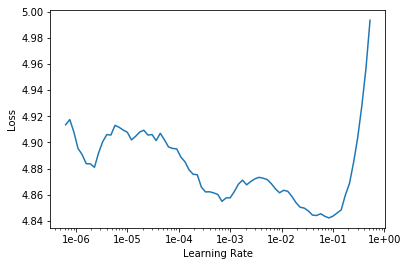

In [27]:
learn.recorder.plot(skip_end=15)

In [28]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.199748,4.060097,0.292783,47:11
